In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
from   scipy             import signal
from   scipy.interpolate import interp1d
import scipy.io          as scio
import sounddevice       as sd
import os

In [ ]:
#Cálculo de FFT [dB]
def fou(senal,sr):

    f  = np.fft.fft(senal)
    h  = 20*np.log10(np.abs(f))[:int(f.shape[0]/2)]
    w  = np.linspace(0,sr/2,int(f.shape[0]/2))

    return h, w

In [ ]:
datapath = os.getcwd()+'\\data\\'

In [ ]:
BPW = pd.read_csv(datapath + "BPW.csv")
BPW = BPW.values
time = BPW[1:,0]
mmHg = BPW[1:,1]

l = len(mmHg)
print(l)

In [ ]:
mmHg = mmHg.astype(np.float)
time = time.astype(np.float)

plt.figure(figsize=(30,10))
plt.plot(time[0:100],mmHg[0:100])
plt.show()

deltaT = time[2]-time[1]
print(deltaT)
sr = 1/deltaT
print(sr)

In [ ]:
f = interp1d(time, mmHg,kind='cubic')
time_n = np.linspace(time[0], time[-1], num=len(mmHg)*2, endpoint=True)
mmHg_n = f(time_n)

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(time_n,mmHg_n)
plt.xlim(0,1)

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(time_n[0:200],mmHg_n[0:200],'bo')
plt.plot(time[0:100],mmHg[0:100],'ro')
plt.show()

In [ ]:
dT = time_n[2]-time_n[1]
print(dT)
fm = 1/dT
print(fm)

In [ ]:
h,w = fou(mmHg_n,200)

plt.figure(figsize=(30,10))
plt.plot(w,h)
plt.grid(True)
plt.show()

In [ ]:
mat = scio.loadmat('fetalPCG_simulatedSNR-4_4dBm.mat')
mat.keys()
PCG = mat['val'][0]

plt.figure(figsize=(30,10))
plt.plot(PCG[0:4000])
plt.show()

In [ ]:
time = np.linspace(0,len(PCG)/1000,len(PCG))
plt.figure(figsize=(30,10))
plt.plot(time,PCG)
plt.show()

In [ ]:
sd.play(PCG,1000)

In [ ]:
h,w = fou(PCG,1000)

plt.figure(figsize=(30,10))
plt.plot(w,h)
plt.grid(True)
plt.axis([0,200,70,140])
plt.show()

In [ ]:
ruido = np.sin(time*2*np.pi*80)*1000
plt.figure(figsize=(30,10))
plt.plot(ruido[0:100])
plt.show()

h,w = fou(ruido,1000)

plt.figure(figsize=(30,10))
plt.plot(w,h)
plt.grid(True)
#plt.axis([0,200,0,80])
plt.show()

In [ ]:
PCG_c = PCG + ruido

h,w = fou(PCG_c,1000)

plt.figure(figsize=(30,10))
plt.plot(w,h)
plt.grid(True)
#plt.axis([0,200,0,80])
plt.show()

In [ ]:
sd.play(PCG,1000)

In [ ]:
sd.play(PCG_c,1000)

In [ ]:
fetal = pd.read_csv("fetal_ECG.csv")
fetal = fetal.values

In [ ]:
timef = fetal[1:,0]
ECG   = fetal[1:,1]

In [ ]:
ECG = ECG.astype(np.float)
timef = timef.astype(np.float)


print (ECG)

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(ECG)

In [ ]:
df = timef[2]-timef[1]
print(df)
fm = 1/df
print(fm)

In [ ]:
h,w = fou(ECG, fm)

plt.figure(figsize=(30,10))
plt.plot(w,h)
plt.grid(True)

In [ ]:
# ECG derivación II

ECG = pd.read_csv(datapath + "ECG.csv")
ECG = ECG.values

In [ ]:
time = ECG[1:,0]
senal = ECG[1:,1]

senal = senal.astype(np.float)
time  = time.astype(np.float)

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(time,senal)
# plt.xlim(0,5)

h,w = fou(senal,1000)
plt.figure(figsize = (30,10))
plt.plot(w,h)
plt.xlim(0,200)
plt.grid(True)

In [ ]:
#Senoidal de 0.5 Hz, contaminar con frecuencia respiratoria 

A = 0.1
sen_1 = np.sin(time*2*np.pi*0.4)*A

ECG_c = sen_1 + senal
plt.figure(figsize = (30,10))
plt.plot(time, ECG_c)
plt.grid(True)

h, w = fou(ECG_c, 1000)
plt.figure(figsize = (30,10))
plt.plot(w,h)
plt.grid(True)

In [ ]:
"""Acordes"""

Fm = 8000
time = np.linspace(0,10,Fm*10)

frec = [261.63,277.18,293.66,311.13,329.63,349.23,369.99,392.,415.3,440.0,466.0,493.88,523.25,554.37,587.33,622.25,659.26,698.46,739.99]
notes = []

for i in range(len(frec)):
    tem = np.sin(2*np.pi*time*frec[i])
    notes.append(tem.tolist()) 
    
notes = np.asarray(notes, np.float)
#print(notes)

In [ ]:
sd.play(notes[0,:],Fm)

In [ ]:
chords = []

for i in [0,2,4,5,7,9,11]:
    tem = notes[i]+notes[i+4]+notes[i+7]
    chords.append(tem.tolist())

In [ ]:
chords = np.asarray(chords, np.float)
sd.play(chords[0,:],Fm)

In [ ]:
h,w = fou(chords[0,:],Fm)
plt.plot(w,h)
plt.xlim(200,500)

In [ ]:
type(chords)

In [ ]:
bidmc = scio.loadmat(datapath + "bidmc01m.mat")
# bidmc = bidmc.values
print('bidmc: ',bidmc.keys())
bidmc   = bidmc['val'][0]
sr = 125 

In [ ]:
time = np.linspace(0,len(bidmc)/sr,len(bidmc))
len(bidmc)

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(time,bidmc)


In [6]:
"""Último intento de grabar el archivo wav"""

datapath = os.getcwd()+'\\data\\'

ECG = scio.loadmat(datapath+'004bm.mat')
ECG      = ECG['val'][0]
sr   = 1000
t = np.linspace(0,len(ECG)/sr,len(ECG))
L = ECG.shape[0]

In [8]:
from scipy.io.wavfile  import write

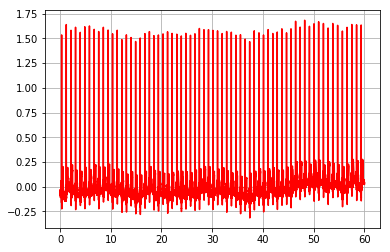

In [20]:
## Interpolate
#TODO evaluar que la frecuencia de muestreo sea menor a 8000 Hz
Lw = 8000
tw = np.linspace( 0, L/sr, int(L/sr*Lw) )
 
inter = interp1d(t, ECG, kind='cubic')
Xfwav = inter(tw)
 
 
#avoid saturation
tol   = 1
xmax  = Xfwav.max()
xmin  = Xfwav.min()
Xfwav = 2*tol*(Xfwav/(xmax-xmin) )
 
## To integer
#Xfwav = (Xfwav*2**16/xmax).astype('int')
 
plt.plot(tw, Xfwav, 'r')
plt.grid(True)
plt.show()
 
# Save
write( datapath+'ECG.wav', Lw, Xfwav )